In [1]:
import pandas as pd
from datetime import date
import pandas as pd
import glob

In [2]:
datadir = 'data/'
datafiles = glob.glob(datadir + '*.csv')

cleaned_data = pd.DataFrame(columns=['pnum', 'condition', 'tnum', 'perCorr', 'avgRT'])

# Initialize lists to store results
conditions = []
perCorrs = []
avgRTs = []
avgRT_corrects = []

for file in datafiles:
    # Read in data
    data = pd.read_csv(file)
    # Process all 6 trials
    for i in range(1, 7):
        # Get participant number
        pnum = data['participant'].iloc[1]
        # Get condition for current trial
        noise = data[f'T{i}A'].apply(lambda x: x.split('/')[1].split('_')[0] if isinstance(x, str) else x)
        speed = data[f'T{i}A'].apply(lambda x: x.split('/')[1].split('_')[2].split('.wav')[0] if isinstance(x, str) else x)
        condition = (noise + '_' + speed).iloc[1]
        conditions.append(condition)
        # add trial number
        tnum = i

        # Get accuracy and reaction time for current trial
        accuracy_fields = [f'T{i}Q{j}R.corr' for j in range(1, 11)]
        rt_fields = [f'T{i}Q{j}R.rt' for j in range(1, 11)]
        accuracies = data.loc[1, accuracy_fields]
        rts = data.loc[1, rt_fields]

        # Reset index for accuracies and rts
        accuracies = accuracies.reset_index(drop=True)
        rts = rts.reset_index(drop=True)

        # Get reaction times for correct responses only
        correct_rts = rts[accuracies == 1]

        # Average reaction time for correct responses
        avgRT_correct = correct_rts.mean()
        avgRT_corrects.append(avgRT_correct)

        # Average accuracy for current trial
        perCorr = accuracies.mean()
        perCorrs.append(perCorr)

        # Average reaction time for current trial
        avgRT = rts.mean()
        avgRTs.append(avgRT)

        # Append results to cleaned_data
        cleaned_data = cleaned_data._append({'pnum': pnum, 'condition': condition, 'tnum': tnum, 'perCorr': perCorr, 'avgRT': avgRT, 'avgCorrRT': avgRT_correct}, ignore_index=True)

cleaned_data

,pnum,condition,tnum,perCorr,avgRT,avgCorrRT
0,989,Noise_1.5x,1,0.3,0.489048,1.489965
1,989,Noise_2.0x,2,0.1,0.140848,0.120772
2,989,Noise_1.0x,3,0.2,0.126006,0.189529
3,989,Clear_2.0x,4,0.2,0.164438,0.124093
4,989,Clear_1.0x,5,0.2,0.161435,0.126774
...,...,...,...,...,...,...
217,p9866,Noise_1.0x,2,0.0,15.644179,NaN
218,p9866,Noise_1.5x,3,0.3,20.421581,4.928491
219,p9866,Clear_1.0x,4,0.3,36.854605,3.967259
220,p9866,Clear_1.5x,5,0.5,5.295419,4.864770


In [5]:
cleaned_data = cleaned_data[cleaned_data['pnum'] != 'p9866']
cleaned_data = cleaned_data[cleaned_data['pnum'] != 989]

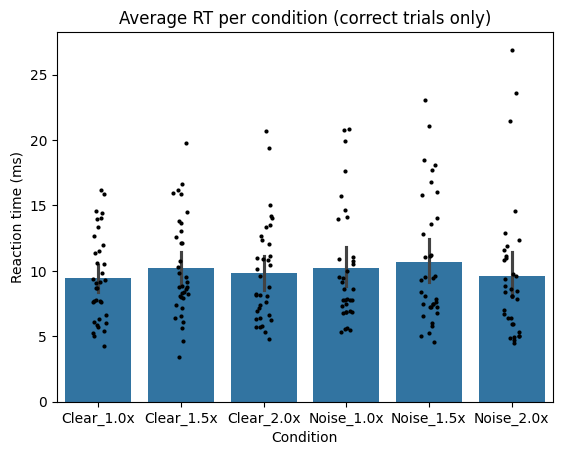

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
order = ['Clear_1.0x', 'Clear_1.5x', 'Clear_2.0x', 'Noise_1.0x', 'Noise_1.5x', 'Noise_2.0x']
plt.figure()
sns.barplot(x='condition', y='avgCorrRT', data=cleaned_data, order=order)
sns.stripplot(x='condition', y='avgCorrRT', data=cleaned_data, order=order, color='black', size=3)
plt.ylabel('Reaction time (ms)')
plt.xlabel('Condition')
plt.title('Average RT per condition (correct trials only)')
# Save plot to vector image
plt.savefig('RT_per_condition_correct_trials_only.pdf', dpi=1200)

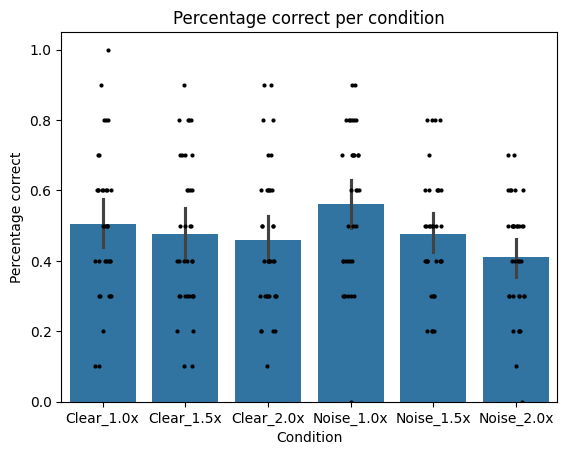

In [15]:
%matplotlib inline
# plot perCorr per condition
import seaborn as sns
import matplotlib.pyplot as plt
order = ['Clear_1.0x', 'Clear_1.5x', 'Clear_2.0x', 'Noise_1.0x', 'Noise_1.5x', 'Noise_2.0x']
plt.figure()
sns.barplot(x='condition', y='perCorr', data=cleaned_data, order=order)
sns.stripplot(x='condition', y='perCorr', data=cleaned_data, order=order, color='black', size=3)
plt.xlabel('Condition')
plt.ylabel('Percentage correct')
plt.title('Percentage correct per condition')
# Save plot to vector image
plt.savefig('perc_correct_per_condition.pdf', dpi=1200)

In [ ]:
# Test if getting the correct answer meant faster reaction times by comparing avgRT and avgCorrRT, drop NA values in case of missing data
cleaned_data.dropna(inplace=True)
from scipy.stats import ttest_rel
t, p = ttest_rel(cleaned_data['avgRT'], cleaned_data['avgCorrRT'])
print(f'T-test for difference in reaction times between all trials and correct trials: t = {t}, p = {p}')
